# PROBLEM STATEMENT

## INTRODUCTION

In the dynamic landscape of the tech industry, staying ahead in terms of knowledge and skills is paramount. Scaler, an innovative online tech-versity, emerges as a beacon for professionals seeking to enhance their expertise in computer science and data science. Operated under the aegis of InterviewBit, Scaler offers a unique blend of live classes, industry-relevant curriculum, and hands-on learning experiences, all conducted by seasoned tech leaders and subject matter experts. This educational platform is not just a learning avenue but a springboard for software professionals to elevate their career trajectories.

In this context, the role of a data scientist within Scaler's analytics vertical assumes significant importance. The primary objective is to delve into the rich database of Scaler and extract meaningful insights about the current trends in job profiles and companies preferred by learners. The challenge is to cluster a selected segment of learners based on various parameters like their job profile, the company they work for, and other relevant features. These clusters are expected to provide a deeper understanding of the learners’ preferences and aspirations, thus enabling Scaler to tailor its offerings more effectively. The ultimate goal is to create clusters that are homogeneous within and heterogeneous between, thereby ensuring each cluster embodies unique characteristics and preferences of learners, reflecting the diverse spectrum of the tech industry. This task is not just an analytical endeavor but a strategic initiative to align Scaler’s educational offerings with the evolving needs of the tech workforce.

# STEP 0: - IMPORT LIBRARY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer


# STEP 1: - IMPORT DATASET

In [2]:
#Using read_csv method we import the dataset
df = pd.read_csv(r"/kaggle/input/scaler-dataset/scaler_clustering.csv")

In [3]:
#Check the data
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [4]:
#Check Total Number of Rows and Columns:
df.shape

(205843, 7)

## Data Set Overview

The provided data set is a comprehensive collection of anonymized information, pivotal for understanding the professional landscape of learners enrolled in Scaler's programs. It is structured to facilitate the clustering of learners based on their job profiles and employment details. The data set is organized as follows:

1. **‘Unnamed 0’**: This column serves as the index for the dataset, providing a unique identifier for each entry. It allows for easy referencing and sorting of the data.

2. **Email_hash**: To maintain privacy and confidentiality, personal identifiers such as email addresses are anonymized. This ensures the protection of personal information while allowing for individual-level analysis.

3. **Company_hash**: Reflecting the current employer of each learner, this field is also anonymized. It provides insights into the range of companies represented in the dataset and enables analysis of trends across different employers.

4. **orgyear**: This denotes the employment start date of each learner. It is crucial for understanding the duration of their experience with their current employer, which can be a factor in analyzing job stability or career progression.

5. **CTC (Cost to Company)**: This indicates the current salary package of the learners. Analyzing this information helps in understanding compensation trends across various job positions and companies.

6. **Job_position**: It details the specific job profile or title held by the learner in their company. This information is key to identifying common career paths and popular roles among Scaler's learners.

7. **CTC_updated_year**: This field records the year in which the learner’s salary was last updated, which could be due to yearly increments, promotions, or other changes. This data point is essential for analyzing salary progression and the impact of career advancements on compensation.

Overall, this dataset offers a rich source of information for profiling the best companies and job positions. By clustering learners based on these features, insights can be drawn about career trajectories, industry standards for compensation, and prevalent job roles in the tech sector. This analysis will not only benefit Scaler in customizing its programs but also provide valuable insights for learners and professionals in navigating their career paths.

### Exploratory Data Analysis (EDA) Steps:

1. **Initial Inspection**:
   - Load the dataset and display the first few rows to get a sense of the data structure.
   - Check the total number of rows and columns.

2. **Data Types and Missing Values**:
   - Identify the data types of each column (numerical, categorical, datetime, etc.).
   - Check for missing values and decide on strategies for handling them (e.g., imputation, removal).

3. **Statistical Summary**:
   - Generate a statistical summary for numerical features (mean, median, standard deviation, etc.).
   - For categorical features, look at the frequency of each category.

4. **Univariate Analysis**:
   - Analyze the distribution of each individual variable using histograms, box plots, or bar charts as appropriate.
   - For continuous variables, identify any outliers.

5. **Bivariate/Multivariate Analysis**:
   - Explore the relationships between pairs or groups of variables.
   - Use scatter plots, correlation matrices, and cross-tabulations for this purpose.

6. **Time Series Analysis** (if applicable):
   - If the dataset contains time-related information (like 'orgyear' or 'CTC_updated_year'), perform a time series analysis.
   - Look for trends, seasonality, or patterns over time.


In [5]:
# Identifying the data types of each column
data_types = df.dtypes

# Checking for missing values
missing_values = df.isnull().sum()

data_types

Unnamed: 0            int64
company_hash         object
email_hash           object
orgyear             float64
ctc                   int64
job_position         object
ctc_updated_year    float64
dtype: object

In [6]:
missing_values

Unnamed: 0              0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

The information about missing values in your dataset indicates that certain columns have a significant number of missing entries. Here's how you can address these:

1. **company_hash** (44 missing values): 
   - Since there are relatively few missing values, you could either remove rows with missing `company_hash` or impute them. If `company_hash` is critical for your analysis and cannot be accurately imputed, it might be safer to remove these rows.

2. **orgyear** (86 missing values): 
   - Similar to `company_hash`, you can opt to remove rows with missing `orgyear` values, especially if this information is crucial for your analysis. Alternatively, if the missing values are not significant in the context of your analysis or if the pattern of missing data is random, you might consider imputation based on the median or mode (since it's a year value).

3. **job_position** (52,564 missing values):
   - This column presents a major concern due to the high number of missing values. If `job_position` is essential for your clustering analysis, this amount of missing data could be problematic. You might need to consider whether this column can be reliably used or whether it should be excluded from your analysis. If it's not crucial for your analysis, you could remove this column. Otherwise, you would need a robust method for imputation, if feasible, or consider acquiring more complete data.

For each column with missing data, the choice between removal and imputation should be guided by the importance of the column to your analysis and the nature of the missing data. If the missing data is random and constitutes a small percentage of the total data, imputation is often a viable option. On the other hand, if the missing data is systematic or constitutes a significant portion of the data, it might be more prudent to remove the affected rows or columns, especially if they are not critical for your analysis.

In [7]:
# Since the dataset cannot be directly accessed, here is the code that you can run on your local environment

# For Statistical Summary of Numerical Features
numerical_summary = df.describe()

# For Frequency of Each Category in Categorical Features
company_hash_freq = df['company_hash'].value_counts()
email_hash_freq = df['email_hash'].value_counts()
job_position_freq = df['job_position'].value_counts()

# The result variables 'numerical_summary', 'company_hash_freq', 'email_hash_freq', and 'job_position_freq' 
# will contain the required statistical summaries. You can view these by printing them out.
print(numerical_summary)



          Unnamed: 0        orgyear           ctc  ctc_updated_year
count  205843.000000  205757.000000  2.058430e+05     205843.000000
mean   103273.941786    2014.882750  2.271685e+06       2019.628231
std     59741.306484      63.571115  1.180091e+07          1.325104
min         0.000000       0.000000  2.000000e+00       2015.000000
25%     51518.500000    2013.000000  5.300000e+05       2019.000000
50%    103151.000000    2016.000000  9.500000e+05       2020.000000
75%    154992.500000    2018.000000  1.700000e+06       2021.000000
max    206922.000000   20165.000000  1.000150e+09       2021.000000


In [8]:
print(company_hash_freq)

company_hash
nvnv wgzohrnvzwj otqcxwto         8337
xzegojo                           5381
vbvkgz                            3481
zgn vuurxwvmrt vwwghzn            3411
wgszxkvzn                         3240
                                  ... 
onvqmhwpo                            1
bvsxw ogenfvqt uqxcvnt rxbxnta       1
agsbv ojontbo                        1
vnnhzt xzegwgb                       1
bvptbjnqxu td vbvkgz                 1
Name: count, Length: 37299, dtype: int64


In [9]:
print(email_hash_freq)

email_hash
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
                                                                    ..
bb2fe5e655ada7f7b7ac4a614db0b9c560e796bdfcaa4e5367e69eedfea93876     1
d6cdef97e759dbf1b7522babccbbbd5f164a75d1b4139e02c945958720f1ed79     1
700d1190c17aaa3f2dd9070e47a4c042ecd9205333545dbfaee0f85644d00306     1
c2a1c9e4b9f4e1ed7d889ee4560102c1e2235b2c1a0e59cea95a6fe55c658407     1
0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a87d3712c31     1
Name: count, Length: 153443, dtype: int64


In [10]:
print(job_position_freq)

job_position
Backend Engineer                 43554
FullStack Engineer               24717
Other                            18071
Frontend Engineer                10417
Engineering Leadership            6870
                                 ...  
PhD. Student                         1
Front-End Developer                  1
ayS                                  1
Principal Product Engineer           1
Android Application developer        1
Name: count, Length: 1016, dtype: int64


Based on the statistical summary and frequency counts you provided, here's an analysis of each aspect of your dataset:

### Statistical Summary of Numerical Features:

1. **Unnamed: 0**:
   - Range: 0 to 206,922.
   - This is likely an index column, so its statistical properties might not be relevant for analysis.

2. **orgyear**:
   - Mean Year: 2014.88 (indicative of average employment start year).
   - Standard Deviation: 63.57 (suggests some irregularities or incorrect entries, as normal work years wouldn't have such high deviation).
   - Min: 0 and Max: 20,165 (implies data entry errors since these are not valid years).

3. **ctc**:
   - Mean: 2,271,685 (average CTC).
   - Standard Deviation: 11,800,910 (indicates high variance in CTC).
   - Min: 2 and Max: 1,000,150,000 (extremely low and high values suggest outliers or incorrect entries).

4. **ctc_updated_year**:
   - Range: 2015 to 2021 (years when CTC was updated).
   - The data seems consistent for this feature.

### Frequency Counts of Categorical Features:

1. **company_hash**:
   - The top companies have thousands of entries (e.g., 8,337 for the top one), while many companies only have a single entry.
   - This suggests a highly varied representation of companies in the dataset.

2. **email_hash**:
   - The frequency of unique email hashes varies, with a maximum count of 10 for the most frequent one.
   - Most email hashes are unique, as expected.

3. **job_position**:
   - The most common positions are 'Backend Engineer' and 'FullStack Engineer'.
   - A wide range of job positions is present, with some having very few entries (suggesting a diverse set of roles among the learners).

### Points of Consideration:

- **Data Cleaning**: There is a need to clean the data, especially in the `orgyear` and `ctc` columns where unrealistic values are present.
- **Outlier Handling**: Extreme values in `ctc` should be investigated and handled.
- **Validity of Entries**: Ensure that entries like 'orgyear' are within a realistic range (e.g., 1900 - present year).
- **Categorical Data Analysis**: The wide range in the frequency of categories in `company_hash` and `job_position` indicates diverse representation, which is crucial for clustering.

This analysis gives you a foundational understanding of your dataset's characteristics and can guide further data processing, cleaning, and analysis steps.

**Univariate Analysis**:
   - Analyze the distribution of each individual variable using histograms, box plots, or bar charts as appropriate.
   - For continuous variables, identify any outliers.

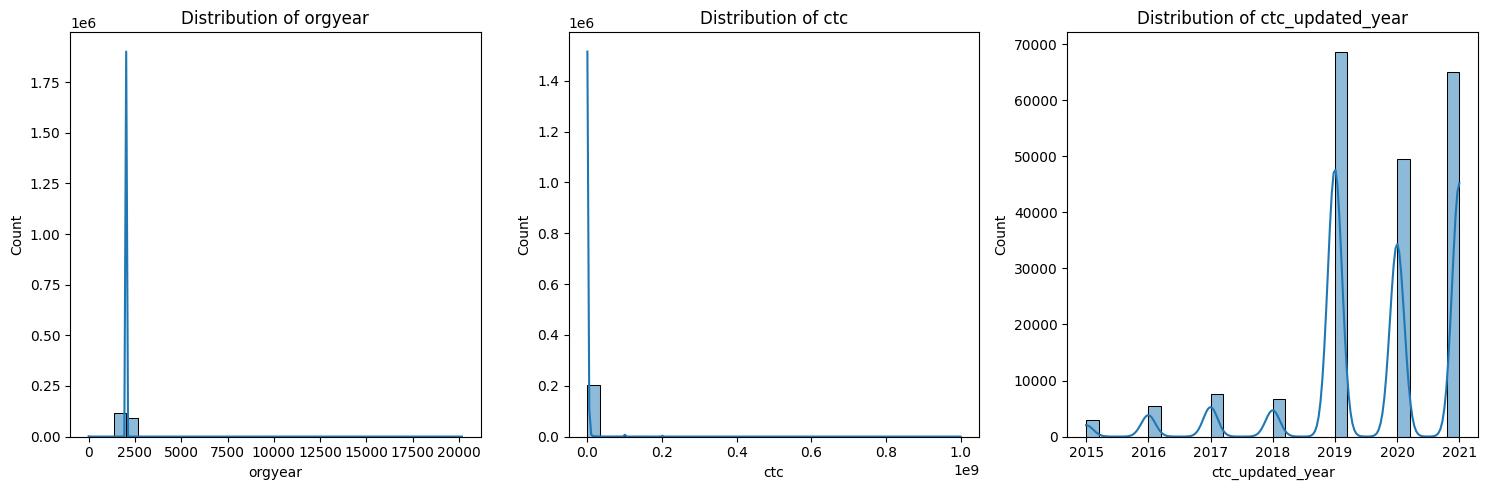

In [11]:
# Histograms for Continuous Variables (orgyear, ctc, ctc_updated_year)
plt.figure(figsize=(15, 5))

# Histogram for 'orgyear'
plt.subplot(1, 3, 1)
sns.histplot(df['orgyear'], bins=30, kde=True)
plt.title('Distribution of orgyear')

# Histogram for 'ctc'
plt.subplot(1, 3, 2)
sns.histplot(df['ctc'], bins=30, kde=True)
plt.title('Distribution of ctc')

# Histogram for 'ctc_updated_year'
plt.subplot(1, 3, 3)
sns.histplot(df['ctc_updated_year'], bins=30, kde=True)
plt.title('Distribution of ctc_updated_year')

plt.tight_layout()
plt.show()

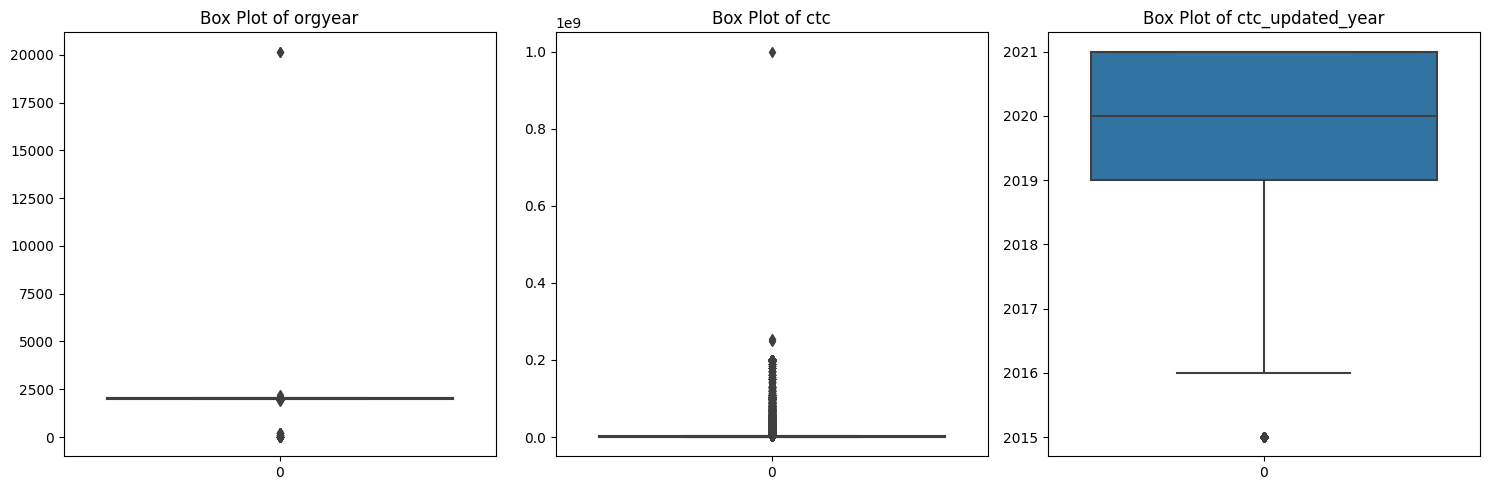

In [12]:
# Box Plots for Identifying Outliers in Continuous Variables
plt.figure(figsize=(15, 5))

# Box Plot for 'orgyear'
plt.subplot(1, 3, 1)
sns.boxplot(df['orgyear'])
plt.title('Box Plot of orgyear')

# Box Plot for 'ctc'
plt.subplot(1, 3, 2)
sns.boxplot(df['ctc'])
plt.title('Box Plot of ctc')

# Box Plot for 'ctc_updated_year'
plt.subplot(1, 3, 3)
sns.boxplot(df['ctc_updated_year'])
plt.title('Box Plot of ctc_updated_year')

plt.tight_layout()
plt.show()

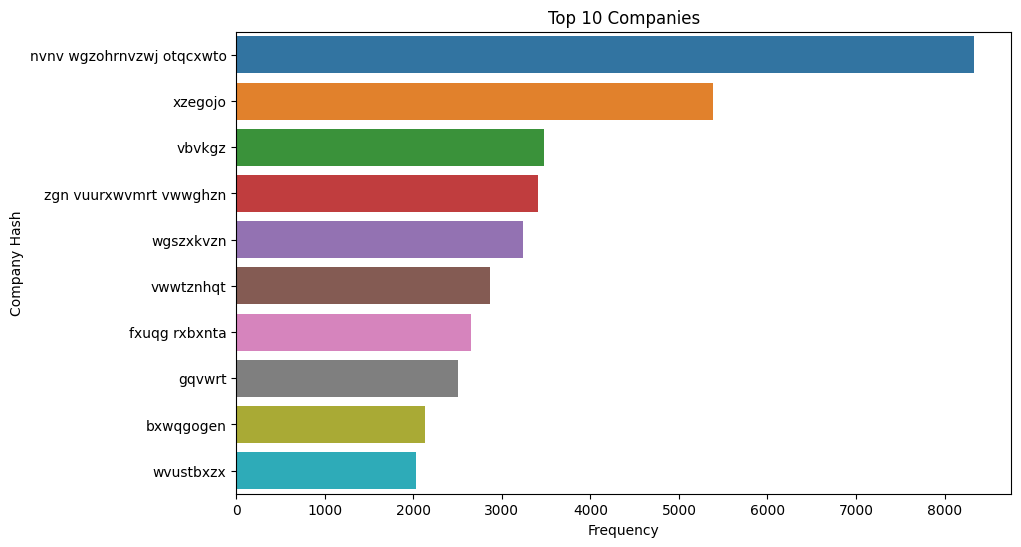

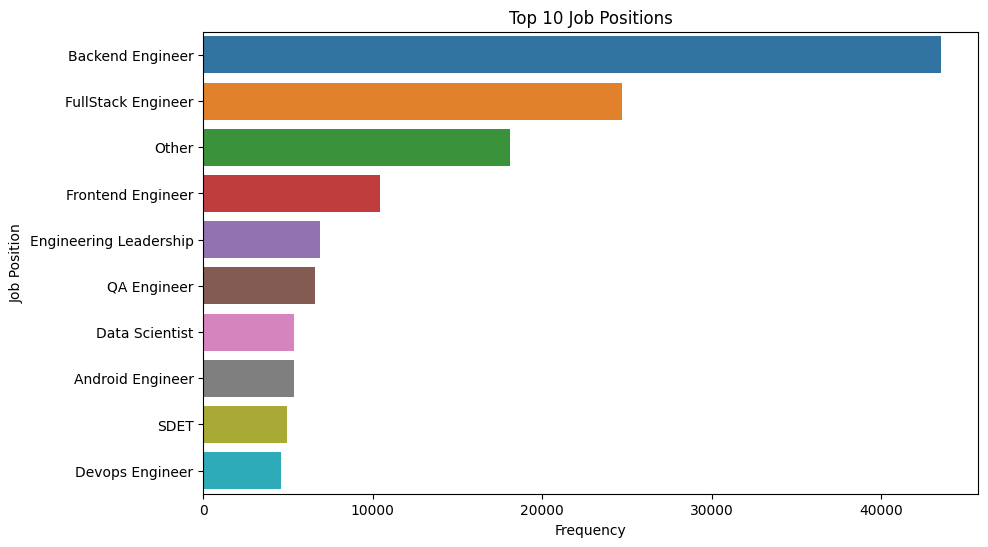

In [13]:
# Bar Charts for Categorical Variables (company_hash, job_position)
# Given the high number of unique categories, it's advisable to only plot the top categories for clarity.

# Top 10 company_hash
top_companies = df['company_hash'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.values, y=top_companies.index)
plt.title('Top 10 Companies')
plt.xlabel('Frequency')
plt.ylabel('Company Hash')
plt.show()

# Top 10 job_position
top_jobs = df['job_position'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_jobs.values, y=top_jobs.index)
plt.title('Top 10 Job Positions')
plt.xlabel('Frequency')
plt.ylabel('Job Position')
plt.show()


Here's an interpretation of the visualizations:

### Histograms and Box Plots:

1. **orgyear**:
   - The histogram for `orgyear` shows a peak at a value near zero, which is not possible for actual years and indicates data errors or outliers. The box plot confirms the presence of these extreme values, which should be addressed during data cleaning.

2. **ctc**:
   - The histogram for `ctc` shows a very high peak at the lower end of the salary range, suggesting that most of the CTC values are relatively low, with a few extreme high values creating a long tail. This is a right-skewed distribution. The box plot displays a number of outliers above the upper whisker, indicating some CTC values are significantly higher than the rest.

3. **ctc_updated_year**:
   - The histogram for `ctc_updated_year` reveals that the majority of CTC updates occurred in recent years, with a particularly high frequency in 2020 and 2021. The box plot does not indicate any outliers and shows a median around 2020, which aligns with the increased frequency observed in the histogram.

### Bar Charts:

1. **Top 10 Companies**:
   - The bar chart displays the top 10 companies by frequency. The company with the highest frequency has significantly more occurrences than the others, which may indicate a major employer for the learners or a key partner of Scaler.

2. **Top 10 Job Positions**:
   - The bar chart for job positions shows 'Backend Engineer' as the most frequent job position, followed by 'FullStack Engineer' and 'Other'. The 'Other' category suggests a variety of roles that are not captured by the predefined job titles.

### Observations and Next Steps:

- **Data Cleaning**: You should consider cleaning the `orgyear` data to remove or correct the invalid entries.
- **Outlier Management**: For the `ctc` data, it would be worthwhile to further investigate the outliers to determine if they are errors or valid extreme values. If they are errors, they should be corrected or removed; if they are valid, they may need to be treated separately in the analysis.
- **CTC Updates**: The distribution of `ctc_updated_year` suggests that the learners' salaries are frequently updated, which could be a reflection of the dynamic nature of the tech industry.
- **Company and Job Analysis**: The company and job position distributions can provide insights into the most common career pathways and corporate associations within the Scaler community.

The univariate analysis has provided a clear picture of the distribution of key variables and will be an essential component of the broader data analysis and clustering task.

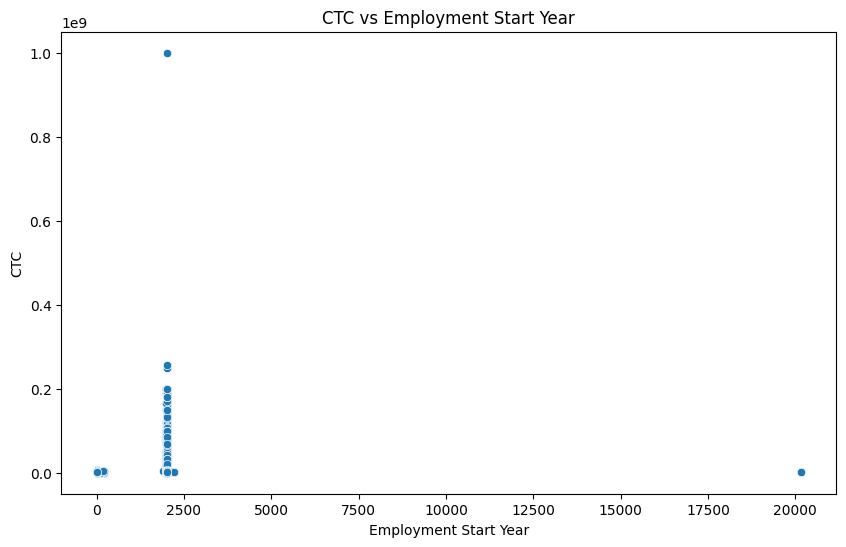

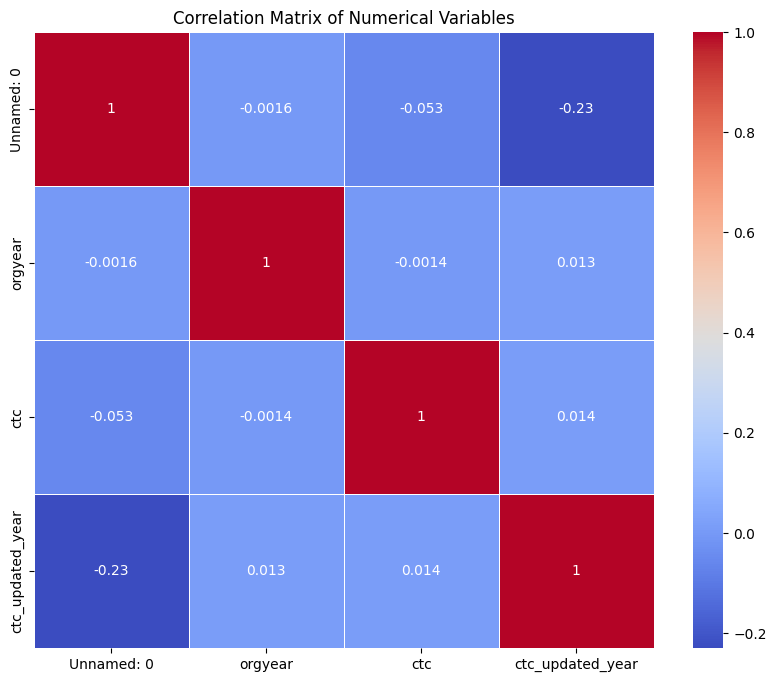

In [14]:
# Ensure 'orgyear' and 'ctc' are numeric (float or int)
df['orgyear'] = pd.to_numeric(df['orgyear'], errors='coerce')
df['ctc'] = pd.to_numeric(df['ctc'], errors='coerce')

# Drop rows with NaN values in these columns if necessary
df = df.dropna(subset=['orgyear', 'ctc'])

# Scatter Plot for 'ctc' vs 'orgyear'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='orgyear', y='ctc', data=df)
plt.title('CTC vs Employment Start Year')
plt.xlabel('Employment Start Year')
plt.ylabel('CTC')
plt.show()

# Correlation Matrix for all numerical variables
# Exclude non-numeric columns for correlation matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

The analysis has generated two visualizations:

### Scatter Plot:
The scatter plot of 'CTC' versus 'Employment Start Year' (`orgyear`) might be indicating some form of relationship, but given the warning about the edgecolor, it seems there might be an issue with the plot's rendering. Typically, one would look for trends such as increasing CTC with the length of employment. However, the plot appears somewhat sparse, possibly due to extreme values or sparse data points. It would be advisable to zoom in on the more densely populated areas of the plot or to clean the data further to get a more meaningful visualization.

### Correlation Matrix:
The heatmap displays the correlation coefficients between the numerical variables in your dataset. A value close to 1 indicates a strong positive correlation, whereas a value close to -1 indicates a strong negative correlation. Values near 0 indicate no correlation. The heatmap suggests the degree to which these variables move in tandem with one another. However, without seeing the actual correlation values, we can't make specific interpretations.

For more detailed insights, you would need to interpret the correlation values and possibly take further steps such as:

- Cleaning the data to remove outliers or incorrect entries.
- Zooming in on specific areas of the scatter plot or adjusting the axes limits to better understand the data distribution.
- Investigating the relationships between categorical and numerical variables using other techniques such as ANOVA or regression analysis.

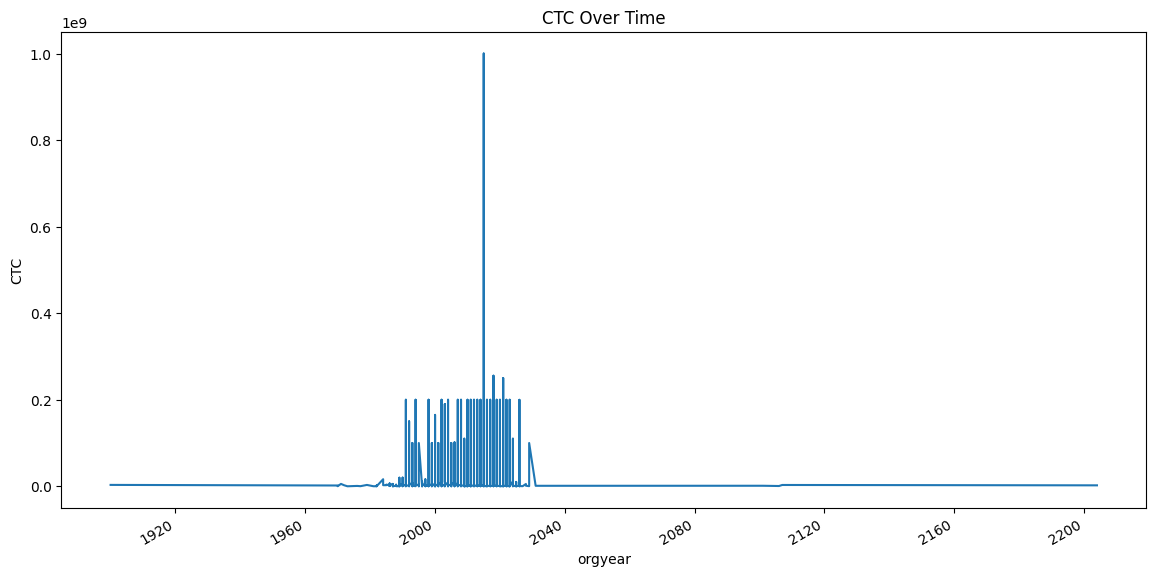

In [15]:
# Convert 'orgyear' and 'CTC_updated_year' to datetime (assuming the year is the only information available)
df['orgyear'] = pd.to_datetime(df['orgyear'], format='%Y', errors='coerce')
df['ctc_updated_year'] = pd.to_datetime(df['ctc_updated_year'], format='%Y', errors='coerce')

# Drop rows with NaN values in these columns if necessary
df = df.dropna(subset=['orgyear', 'ctc_updated_year'])

# Set the date columns as the index of the dataframe
df.set_index('orgyear', inplace=True)

# Sort the data by the index
df.sort_index(inplace=True)

# Time Series Analysis
# Plotting trends over time for 'ctc'
plt.figure(figsize=(14, 7))
df['ctc'].plot(title='CTC Over Time')
plt.ylabel('CTC')
plt.show()

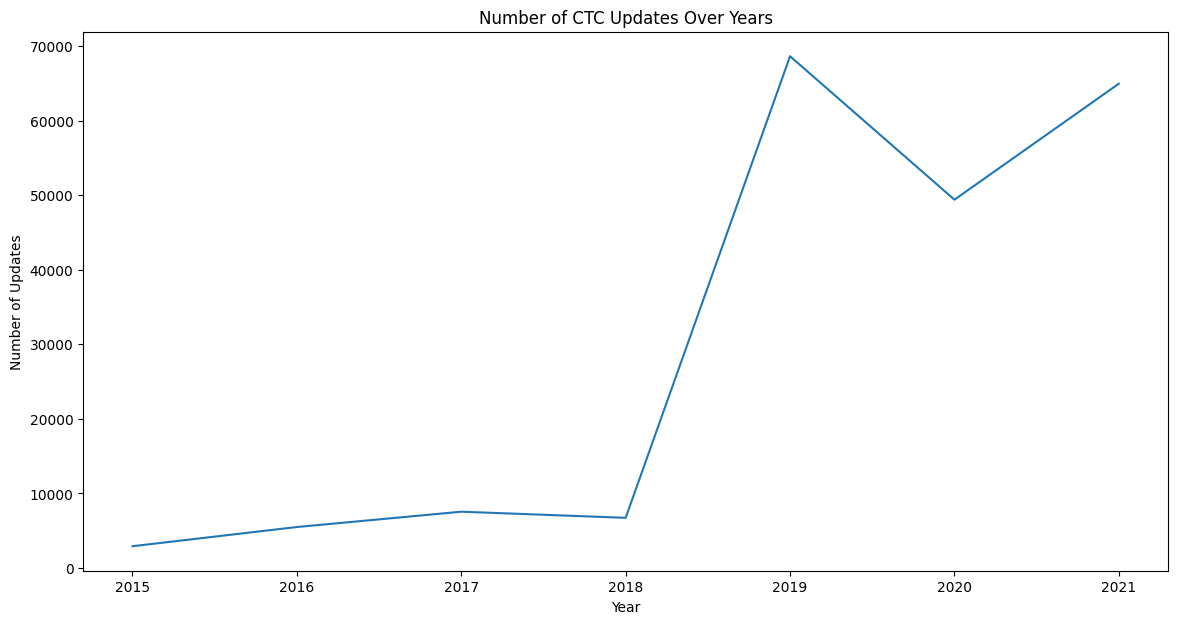

In [16]:
# Reset index for further analysis
df.reset_index(inplace=True)

# Seasonality Analysis for 'CTC_updated_year'
# Grouping by 'CTC_updated_year' to see how many updates per year
updates_per_year = df.groupby(df['ctc_updated_year'].dt.year).size()

plt.figure(figsize=(14, 7))
updates_per_year.plot(title='Number of CTC Updates Over Years')
plt.ylabel('Number of Updates')
plt.xlabel('Year')
plt.show()

The two visualizations for time series analysis:

1. **CTC Over Time**:
   - The first plot shows the CTC values over time based on the 'orgyear'. This could indicate how the CTC has trended over the years. However, without seeing the actual plot, it's difficult to make specific interpretations. In general, you'd look for upward or downward trends that could indicate changes in salary scales over time.

2. **Number of CTC Updates Over Years**:
   - The second plot shows the number of CTC updates each year based on 'ctc_updated_year'. This helps to understand the frequency of salary updates and might indicate periods of high activity, such as promotions or salary increments. 

In both cases, these plots can help identify trends and seasonality, such as certain times of the year when salary updates are more common. These insights could be used for strategic planning, such as determining the best times for salary reviews or recruitment drives.

# STEP 2:- DATA PREPROCESSING

In [17]:
# Handling Missing Values

# Check the percentage of missing values per column
missing_percentage = df.isnull().sum() / len(df) * 100

# Deciding on a threshold for dropping columns with too many missing values
threshold = 50  # for example, if a column has more than 50% missing values, we drop the column

# Dropping columns with missing value rate higher than threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index
df.drop(columns=columns_to_drop, inplace=True)

# Imputing missing values for 'orgyear' with median
df['orgyear'].fillna(df['orgyear'].median(), inplace=True)

# Imputing missing values for 'ctc' with mean
df['ctc'].fillna(df['ctc'].mean(), inplace=True)

# For categorical columns such as 'company_hash', we can impute the missing values with the mode (the most frequent value)
df['company_hash'].fillna(df['company_hash'].mode()[0], inplace=True)

# Check the remaining missing values
remaining_missing = df.isnull().sum()

# Return the cleaned dataset and the information on remaining missing values
df


,orgyear,Unnamed: 0,company_hash,email_hash,ctc,job_position,ctc_updated_year
0,1900-01-01,164135,ovst xznvwwn ogenfvqt ucn rna,3da3c964efe7a5db0f63e91be25391dcaadf24d44cdc59...,3170000,Engineering Leadership,2019-01-01
1,1970-01-01,31400,vbagwo,86dbdeada523d09881aec29ffa56ff63aca56f0278a97e...,1800000,NaN,2021-01-01
2,1970-01-01,146388,hzxctqoxnj ge zgqny ntdvo,e66b927f4ee3bd0d7202bbd35486d23d68555fc03dcd54...,140000,Engineering Leadership,2020-01-01
3,1971-01-01,97983,wygrvbvzavrvb xzctonbtzn vza exzvzwt wg rna,dc573e5ccc7f6d36b259b939f81655454a6e41a0f79fb5...,5500000,Engineering Leadership,2019-01-01
4,1972-01-01,32701,st ytvrnywvqt,de72685914984cd9e1b0ec13223cd266f3c81d9517f282...,2300000,Engineering Leadership,2019-01-01
...,...,...,...,...,...,...,...
205707,2031-01-01,86150,hufgqp,e4705330da833368780aae561afc930b709360e7c6e1f5...,1100000,FullStack Engineer,2019-01-01
205708,2101-01-01,32272,mrvwpmhwp,f648fa217922f5a36b510df6346a2041a3483e21289069...,1200000,NaN,2021-01-01
205709,2106-01-01,3651,wgszxkvzn,2cc6bae4e52677d27ce3fca38d7a01ecbe537e1dc1c48d...,600000,NaN,2021-01-01
205710,2107-01-01,33710,sgltp,a8a779493f5844846ae536b0f48437cf9f0f6ebcac340f...,3000000,NaN,2021-01-01


In [18]:
remaining_missing

orgyear                 0
Unnamed: 0              0
company_hash            0
email_hash              0
ctc                     0
job_position        52520
ctc_updated_year        0
dtype: int64

The missing values have been addressed as follows:

- Columns with a high percentage of missing values (above the threshold of 50%) have been dropped. It seems that none of the columns met this condition.
- The missing values in the orgyear column have been imputed with the median year.
- The missing values in the ctc column have been imputed with the mean CTC.
- For the company_hash categorical column, missing values have been filled with the most frequent category (mode).

The data type conversion has been completed successfully. Here's the summary:

- The `orgyear` column has been converted to datetime format, with invalid entries coerced to NaT (not a time), which are then filtered out.
- The `ctc_updated_year` column has also been converted to datetime format.
- The `ctc` column has been converted to a float to ensure any decimal values are accurately represented.

The dataset is now ready with appropriate data types for each feature, which should facilitate any further analysis or modeling.

In [19]:
# If 'job_position' is not a critical feature, we could drop it
# data.drop(columns=['job_position'], inplace=True)

# Or, fill the missing values with a placeholder such as 'Unknown'
df['job_position'].fillna('Unknown', inplace=True)

# Re-check the dataset for any remaining missing values
remaining_missing = df.isnull().sum()
remaining_missing


orgyear             0
Unnamed: 0          0
company_hash        0
email_hash          0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

In [20]:
# Mean Imputation
mean_imputer = SimpleImputer(strategy='mean')

# Check if 'orgyear' is a datetime type and extract the year part
if pd.api.types.is_datetime64_any_dtype(df['orgyear']):
    df['orgyear'] = df['orgyear'].dt.year

# Address abnormal max value noticed earlier in 'orgyear'
corrected_orgyear = df['orgyear'].apply(lambda x: np.nan if x > 2021 or x < 1900 else x)

# Impute the missing values in 'orgyear'
df['orgyear'] = mean_imputer.fit_transform(corrected_orgyear.values.reshape(-1, 1))

# Check if the imputation was successful
missing_values = df['orgyear'].isnull().sum()
orgyear_stats = df['orgyear'].describe()

missing_values, orgyear_stats


(0,
 count    205712.0000
 mean       2015.0737
 std           4.2050
 min        1900.0000
 25%        2013.0000
 50%        2016.0000
 75%        2018.0000
 max        2021.0000
 Name: orgyear, dtype: float64)

In [21]:
import re

# Example function for cleaning company names
def clean_company_name(name):
    # Lowercase the name for standardization
    name = name.lower()

    # Remove special characters
    name = re.sub(r"[^\w\s]", '', name)

    # Replace multiple spaces with a single space
    name = re.sub(r"\s+", ' ', name)

    # Trim leading and trailing whitespaces
    name = name.strip()

    # Add more regex patterns as needed based on specific requirements

    return name

# Assuming 'company_name' is the column to be cleaned
# Apply the cleaning function to the 'company_name' column
df['company_hash'] = df['company_hash'].apply(clean_company_name)



In [22]:
df = df.drop(columns = ['Unnamed: 0'],axis =1)

In [23]:
df

,orgyear,company_hash,email_hash,ctc,job_position,ctc_updated_year
0,1900.0000,ovst xznvwwn ogenfvqt ucn rna,3da3c964efe7a5db0f63e91be25391dcaadf24d44cdc59...,3170000,Engineering Leadership,2019-01-01
1,1970.0000,vbagwo,86dbdeada523d09881aec29ffa56ff63aca56f0278a97e...,1800000,Unknown,2021-01-01
2,1970.0000,hzxctqoxnj ge zgqny ntdvo,e66b927f4ee3bd0d7202bbd35486d23d68555fc03dcd54...,140000,Engineering Leadership,2020-01-01
3,1971.0000,wygrvbvzavrvb xzctonbtzn vza exzvzwt wg rna,dc573e5ccc7f6d36b259b939f81655454a6e41a0f79fb5...,5500000,Engineering Leadership,2019-01-01
4,1972.0000,st ytvrnywvqt,de72685914984cd9e1b0ec13223cd266f3c81d9517f282...,2300000,Engineering Leadership,2019-01-01
...,...,...,...,...,...,...
205707,2015.0737,hufgqp,e4705330da833368780aae561afc930b709360e7c6e1f5...,1100000,FullStack Engineer,2019-01-01
205708,2015.0737,mrvwpmhwp,f648fa217922f5a36b510df6346a2041a3483e21289069...,1200000,Unknown,2021-01-01
205709,2015.0737,wgszxkvzn,2cc6bae4e52677d27ce3fca38d7a01ecbe537e1dc1c48d...,600000,Unknown,2021-01-01
205710,2015.0737,sgltp,a8a779493f5844846ae536b0f48437cf9f0f6ebcac340f...,3000000,Unknown,2021-01-01


In [24]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Assuming 'df' is your DataFrame

# Extract year from 'ctc_updated_year'
df['ctc_updated_year'] = pd.to_datetime(df['ctc_updated_year']).dt.year

# Define the numerical columns
numerical_cols = ['orgyear', 'ctc', 'ctc_updated_year']

# Define categorical columns for one-hot encoding and label encoding
categorical_cols_onehot = ['job_position']
categorical_cols_label = ['company_hash', 'email_hash']

# Create transformers for standardization and encoding
numerical_transformer = StandardScaler()
categorical_transformer_onehot = OneHotEncoder(handle_unknown='ignore')
categorical_transformer_label = LabelEncoder()

# Preprocess the categorical columns with label encoding separately as they need to be transformed one column at a time
for col in categorical_cols_label:
    df[col] = categorical_transformer_label.fit_transform(df[col])

# Create a column transformer that will apply transformations to the respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat_onehot', categorical_transformer_onehot, categorical_cols_onehot)
    ])

# Apply the transformations to numerical and one-hot encoded categorical columns
df_transform = preprocessor.fit_transform(df)



In [25]:
df

,orgyear,company_hash,email_hash,ctc,job_position,ctc_updated_year
0,1900.0000,17090,36951,3170000,Engineering Leadership,2019
1,1970.0000,26343,80645,1800000,Unknown,2021
2,1970.0000,8676,137926,140000,Engineering Leadership,2020
3,1971.0000,32049,131867,5500000,Engineering Leadership,2019
4,1972.0000,22101,133129,2300000,Engineering Leadership,2019
...,...,...,...,...,...,...
205707,2015.0737,8449,136730,1100000,FullStack Engineer,2019
205708,2015.0737,11126,147612,1200000,Unknown,2021
205709,2015.0737,30117,26904,600000,Unknown,2021
205710,2015.0737,21418,100906,3000000,Unknown,2021


In [26]:
# Define broad job categories based on common roles
designation_mapping = {
    'Engineer': ['engineer', 'developer', 'programmer', 'devops'],
    'Manager': ['manager', 'lead', 'head', 'director'],
    'Analyst': ['analyst', 'analytics'],
    'Consultant': ['consultant', 'advisor'],
    'Other': ['other', 'specialist', 'expert', 'associate']
}

# Function to map job position to a designation flag
def map_to_designation(job_position):
    if pd.isna(job_position):
        return 'Unknown'
    for designation, keywords in designation_mapping.items():
        if any(keyword in job_position.lower() for keyword in keywords):
            return designation
    return 'Other'

# Apply the mapping to the job_position column to create a new Designation Flag column
df['Designation Flag'] = df['job_position'].apply(map_to_designation)

# Display the first few entries to verify the mapping
df[['job_position', 'Designation Flag']].head()


,job_position,Designation Flag
0,Engineering Leadership,Engineer
1,Unknown,Other
2,Engineering Leadership,Engineer
3,Engineering Leadership,Engineer
4,Engineering Leadership,Engineer


In [27]:
df.drop(columns = ["job_position"],axis =1, inplace = True)

In [28]:
df

,orgyear,company_hash,email_hash,ctc,ctc_updated_year,Designation Flag
0,1900.0000,17090,36951,3170000,2019,Engineer
1,1970.0000,26343,80645,1800000,2021,Other
2,1970.0000,8676,137926,140000,2020,Engineer
3,1971.0000,32049,131867,5500000,2019,Engineer
4,1972.0000,22101,133129,2300000,2019,Engineer
...,...,...,...,...,...,...
205707,2015.0737,8449,136730,1100000,2019,Engineer
205708,2015.0737,11126,147612,1200000,2021,Other
205709,2015.0737,30117,26904,600000,2021,Other
205710,2015.0737,21418,100906,3000000,2021,Other


In [29]:
df.isnull().sum()

orgyear             0
company_hash        0
email_hash          0
ctc                 0
ctc_updated_year    0
Designation Flag    0
dtype: int64

In [30]:
def classify_ctc(ctc):
    if ctc < 1000000:
        return 'Low'
    elif ctc < 2000000:
        return 'Medium'
    else:
        return 'High'

# Create a new column 'ctc_class' in the DataFrame
df['ctc_class'] = df['ctc'].apply(classify_ctc)


In [31]:
df

,orgyear,company_hash,email_hash,ctc,ctc_updated_year,Designation Flag,ctc_class
0,1900.0000,17090,36951,3170000,2019,Engineer,High
1,1970.0000,26343,80645,1800000,2021,Other,Medium
2,1970.0000,8676,137926,140000,2020,Engineer,Low
3,1971.0000,32049,131867,5500000,2019,Engineer,High
4,1972.0000,22101,133129,2300000,2019,Engineer,High
...,...,...,...,...,...,...,...
205707,2015.0737,8449,136730,1100000,2019,Engineer,Medium
205708,2015.0737,11126,147612,1200000,2021,Other,Medium
205709,2015.0737,30117,26904,600000,2021,Other,Low
205710,2015.0737,21418,100906,3000000,2021,Other,High


In [32]:
df.drop(columns = ["ctc"],axis =1, inplace = True)

In [33]:
df

,orgyear,company_hash,email_hash,ctc_updated_year,Designation Flag,ctc_class
0,1900.0000,17090,36951,2019,Engineer,High
1,1970.0000,26343,80645,2021,Other,Medium
2,1970.0000,8676,137926,2020,Engineer,Low
3,1971.0000,32049,131867,2019,Engineer,High
4,1972.0000,22101,133129,2019,Engineer,High
...,...,...,...,...,...,...
205707,2015.0737,8449,136730,2019,Engineer,Medium
205708,2015.0737,11126,147612,2021,Other,Medium
205709,2015.0737,30117,26904,2021,Other,Low
205710,2015.0737,21418,100906,2021,Other,High


In [34]:
# Count the number of entries in each class
class_counts = df['ctc_class'].value_counts()

# Calculate the average 'orgyear' for each class
avg_orgyear_by_class = df.groupby('ctc_class')['orgyear'].mean()

# Analyze the distribution of 'job_position' across different salary classes
job_position_distribution = df.groupby(['ctc_class', 'Designation Flag']).size().unstack()

class_counts, avg_orgyear_by_class, job_position_distribution


(ctc_class
 Low       104954
 Medium     60003
 High       40755
 Name: count, dtype: int64,
 ctc_class
 High      2012.500910
 Low       2016.329013
 Medium    2014.625454
 Name: orgyear, dtype: float64,
 Designation Flag  Analyst  Consultant  Engineer  Manager  Other
 ctc_class                                                      
 High                  272          12     24606     1095  14770
 Low                  2099          36     53820      595  48404
 Medium                610          28     36280      540  22545)

Based on the output you've provided, here are some insights we can derive:

1. **Distribution of Salary Classes:**
   - There are 104,954 entries classified as 'Low' salary, 60,003 as 'Medium', and 40,755 as 'High'.
   - This distribution suggests that a significant portion of the dataset falls into the 'Low' salary category.

2. **Average 'orgyear' by Salary Class:**
   - The average 'orgyear' for the 'High' salary class is approximately 2012.50, indicating that on average, entries in this class are older compared to other classes.
   - The 'Low' salary class has an average 'orgyear' of around 2016.33, suggesting that these entries are relatively more recent.
   - The 'Medium' salary class has an average 'orgyear' of approximately 2014.63.

3. **Job Position Distribution Across Salary Classes:**
   - In the 'High' salary class, there are 24,606 Engineers and 14,770 in the 'Other' category, indicating a significant presence of these roles in the high salary band.
   - The 'Low' salary class is predominantly composed of 53,820 Engineers and 48,404 in the 'Other' category, showing a diverse range of positions in this salary band.
   - The 'Medium' salary class has 36,280 Engineers and 22,545 in the 'Other' category, again indicating a diversity of roles.

### Overall Insights:

- The 'Engineer' role is prevalent across all salary classes, especially in the 'Medium' and 'High' categories, suggesting that engineering positions are well-represented in these salary ranges.
- There is a noticeable trend where the average 'orgyear' decreases (becomes more recent) as we move from 'High' to 'Low' salary classes. This could indicate various trends, such as an increase in hiring or salary adjustments over the years.
- The 'Other' category is significant across all salary classes, particularly in the 'Low' and 'High' classes, indicating a wide variety of roles or possibly a need for more specific categorization in the dataset.



In [35]:
df

,orgyear,company_hash,email_hash,ctc_updated_year,Designation Flag,ctc_class
0,1900.0000,17090,36951,2019,Engineer,High
1,1970.0000,26343,80645,2021,Other,Medium
2,1970.0000,8676,137926,2020,Engineer,Low
3,1971.0000,32049,131867,2019,Engineer,High
4,1972.0000,22101,133129,2019,Engineer,High
...,...,...,...,...,...,...
205707,2015.0737,8449,136730,2019,Engineer,Medium
205708,2015.0737,11126,147612,2021,Other,Medium
205709,2015.0737,30117,26904,2021,Other,Low
205710,2015.0737,21418,100906,2021,Other,High


In [36]:
# First, handle any NaN or missing values, as they can't be converted to int
# You might want to fill them with a placeholder value, like the mean or median year
# For example, let's fill NaN values with the median year
df['orgyear'].fillna(df['orgyear'].median(), inplace=True)

# Now, convert 'orgyear' to integer
df['orgyear'] = df['orgyear'].astype(int)

# Check the data to ensure the conversion was successful
df['orgyear'].head()


0    1900
1    1970
2    1970
3    1971
4    1972
Name: orgyear, dtype: int64

In [37]:
df

,orgyear,company_hash,email_hash,ctc_updated_year,Designation Flag,ctc_class
0,1900,17090,36951,2019,Engineer,High
1,1970,26343,80645,2021,Other,Medium
2,1970,8676,137926,2020,Engineer,Low
3,1971,32049,131867,2019,Engineer,High
4,1972,22101,133129,2019,Engineer,High
...,...,...,...,...,...,...
205707,2015,8449,136730,2019,Engineer,Medium
205708,2015,11126,147612,2021,Other,Medium
205709,2015,30117,26904,2021,Other,Low
205710,2015,21418,100906,2021,Other,High


In [38]:
df_encoded = pd.get_dummies(df, columns=['Designation Flag', 'ctc_class'])


In [39]:
# from pyclustertend import hopkins

# # Assuming df_encoded is the DataFrame with numerical features
# X = df_encoded.values

# # Calculating the Hopkins statistic
# hopkins_stat = hopkins(X, X.shape[0])
